In [3]:
# install package
!pip install -U nltk
!pip install -U textblob
!pip install -U wordcloud
!pip install -U plotly
!pip install -U gensim

  Using cached nltk-3.6.5-py3-none-any.whl (1.5 MB)
  Using cached regex-2021.11.10-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (749 kB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached wordcloud-1.8.1-cp37-cp37m-manylinux1_x86_64.whl (366 kB)
  Using cached plotly-5.4.0-py2.py3-none-any.whl (25.3 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
  Using cached gensim-4.1.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)


In [4]:
# import package
import csv
import pandas as pd
import string
import seaborn as sns

#misc
import gc
import time
import warnings

# Convert the Words into Count Vectpr 
from sklearn.feature_extraction.text import CountVectorizer

# Used to Pipe line 
from sklearn.feature_extraction.text import TfidfTransformer

# Train Test Split
from sklearn.model_selection import train_test_split

# Model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression

# For Report 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

#visual
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# settings
start_time=time.time()

In [5]:
# For the Stop Words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import nltk
nltk.download('wordnet')# preprocessing text
from textblob import TextBlob
import string # for finding punctuation in text
import gensim 
from gensim import corpora


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words

import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style

from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text

# import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
# plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
# %matplotlib inline

In [7]:
%%time
# read all csv files
# join_BID_tor = pd.read_csv('join_BID_tor.csv')
join_BID_tor_v2 = pd.read_csv('join_BID_tor_v2.csv')
df_restaurant_tor = pd.read_csv('df_restaurant_tor.csv')
df_review_csv_sept = pd.read_csv('df_review_csv_sept.csv')

CPU times: user 2.51 s, sys: 355 ms, total: 2.87 s
Wall time: 3.74 s


In [8]:
# Summary of the csv file
join_BID_tor_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20433 non-null  int64  
 1   business_id   20433 non-null  object 
 2   name          20433 non-null  object 
 3   neighborhood  17277 non-null  object 
 4   address       20433 non-null  object 
 5   city          20433 non-null  object 
 6   state         20433 non-null  object 
 7   postal_code   20422 non-null  object 
 8   latitude      20433 non-null  float64
 9   longitude     20433 non-null  float64
 10  stars_x       20433 non-null  float64
 11  review_count  20433 non-null  int64  
 12  is_open       20433 non-null  int64  
 13  categories    20433 non-null  object 
 14  review_id     20433 non-null  object 
 15  user_id       20433 non-null  object 
 16  stars_y       20433 non-null  int64  
 17  date          20433 non-null  object 
 18  text          20433 non-nu

In [9]:
# overview of the csv file
join_BID_tor_v2.describe()

,Unnamed: 0,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool,Sentiment
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,10216.000000,43.677076,-79.390625,3.718837,147.329076,0.995106,3.653061,0.665688,0.214408,0.425635,0.801889
std,5898.643361,0.046402,0.048237,0.581681,209.044149,0.069788,1.301382,2.928769,1.619727,2.601176,0.398586
min,0.000000,43.594146,-79.663413,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5108.000000,43.649047,-79.411469,3.500000,31.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,10216.000000,43.656917,-79.392424,4.000000,77.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000
75%,15324.000000,43.677909,-79.378927,4.000000,180.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000
max,20432.000000,43.876501,-79.137178,5.000000,1494.000000,1.000000,5.000000,63.000000,49.000000,62.000000,1.000000


In [10]:
# check if there is any null data
df_review_csv_sept.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
Sentiment      0
dtype: int64

In [11]:
# check if there is any null data
join_BID_tor_v2.isnull().sum()

Unnamed: 0         0
business_id        0
name               0
neighborhood    3156
address            0
city               0
state              0
postal_code       11
latitude           0
longitude          0
stars_x            0
review_count       0
is_open            0
categories         0
review_id          0
user_id            0
stars_y            0
date               0
text               0
useful             0
funny              0
cool               0
FSA               11
Sentiment          0
dtype: int64

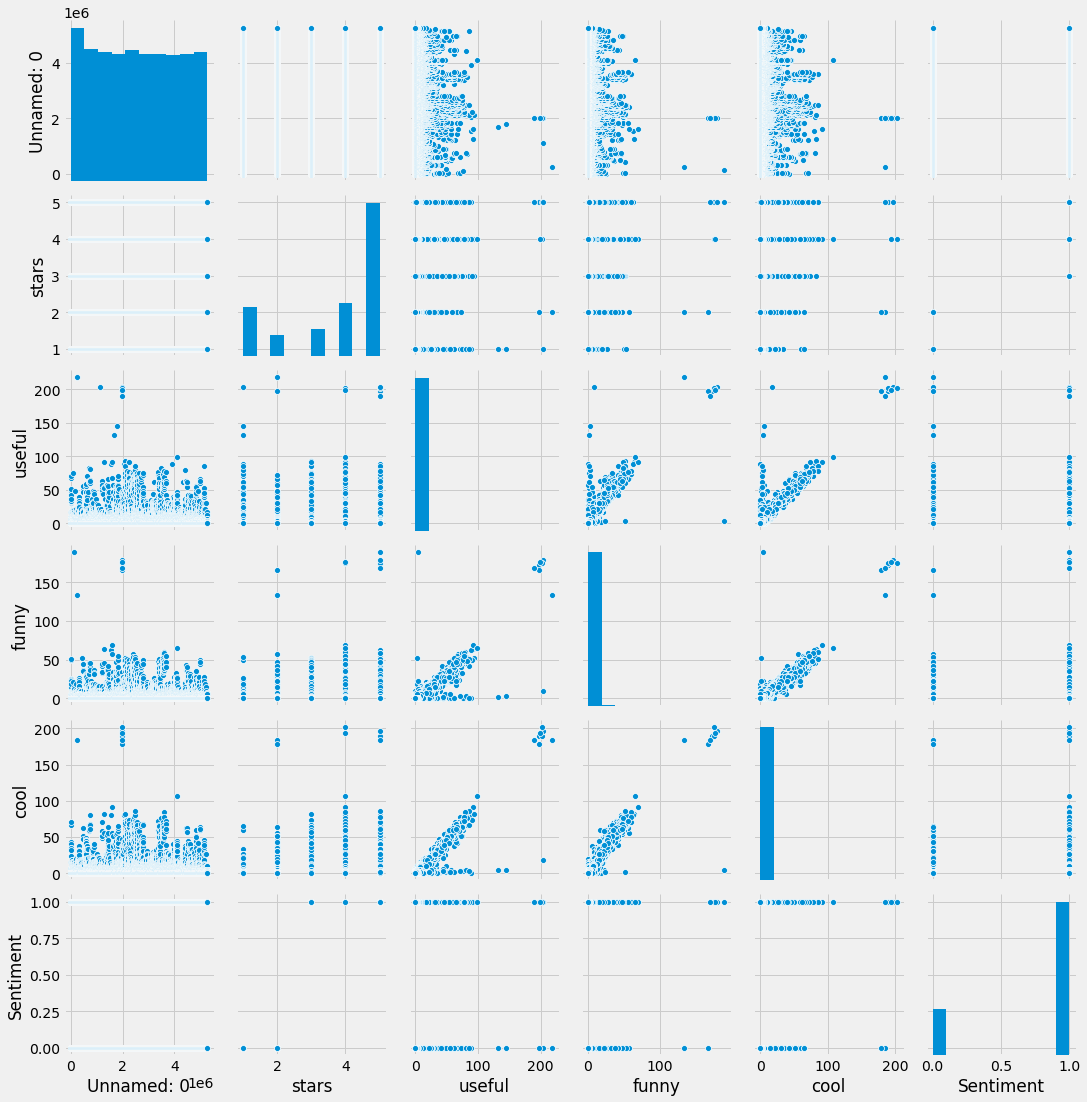

In [12]:
# basic plot for the dataset
sns.pairplot(df_review_csv_sept)

In [13]:
# count of stars rating for the review dataset
df_review_csv_sept["stars"].value_counts()

5    165461
4     56871
1     52910
3     29077
2     22747
Name: stars, dtype: int64

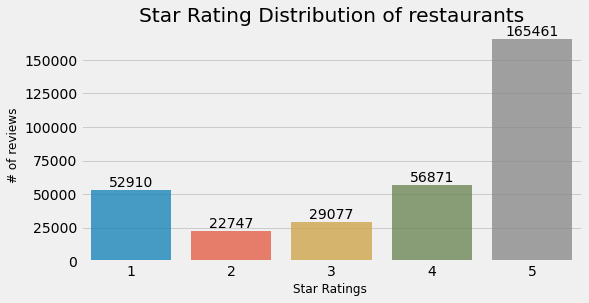

In [14]:
# plot for the count of stars rating for the review dataset
#Get the distribution of the ratings
x=df_review_csv_sept['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution of restaurants")
plt.ylabel('# of reviews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [15]:
# Star distribution in Toronto
most_review = (join_BID_tor_v2.groupby(['city', 'stars_y']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='stars_y'))
most_review

,city,stars_y,count
0,Toronto,5,6645
1,Toronto,4,6249
2,Toronto,3,3491
3,Toronto,1,2147
4,Toronto,2,1901


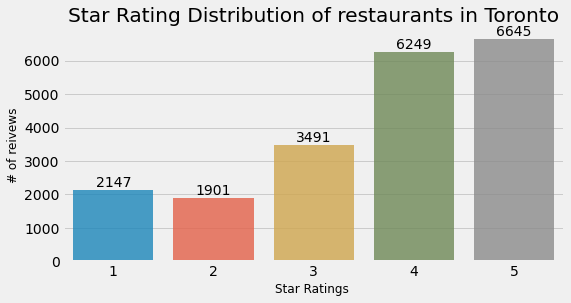

In [16]:
#Get the distribution of the ratings
x=join_BID_tor_v2['stars_y'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution of restaurants in Toronto")
plt.ylabel('# of reivews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [17]:
join_BID_tor_v2["FSA"].value_counts()

M5V    2222
M5T    1737
M6J    1170
M5G     917
M2N     840
       ... 
V0J       2
M6L       2
L4K       1
L4W       1
M2L       1
Name: FSA, Length: 104, dtype: int64

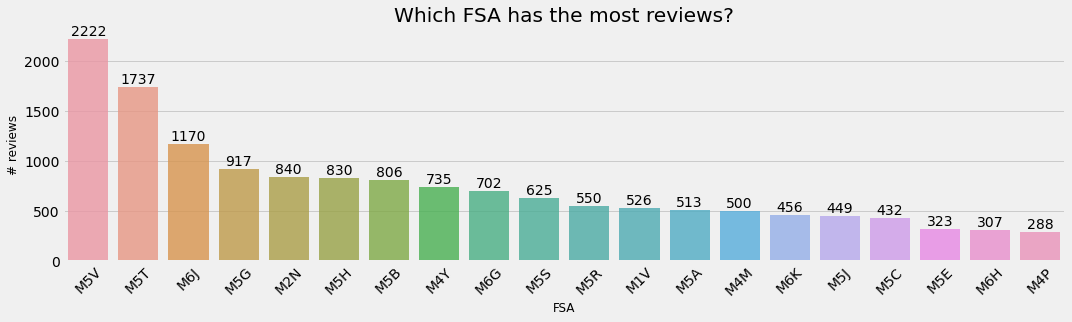

In [18]:
#Get the distribution of the ratings
x = join_BID_tor_v2['FSA'].value_counts()
x = x.sort_values(ascending = False)
x = x.iloc[0:20]
plt.figure(figsize = (16,4))
ax = sns.barplot(x.index, x.values, alpha = 0.8)
plt.title("Which FSA has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)
plt.ylabel('# reviews', fontsize = 12)
plt.xlabel('FSA', fontsize = 12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [19]:
# stars rating count of the FSA with the most reviews
most_review_FSA = (join_BID_tor_v2.groupby(['FSA', 'stars_y']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='stars_y'))
most_review_FSA

,FSA,stars_y,count
0,M5V,5,735
1,M5V,4,669
5,M5V,3,384
15,M5V,2,233
20,M5V,1,201


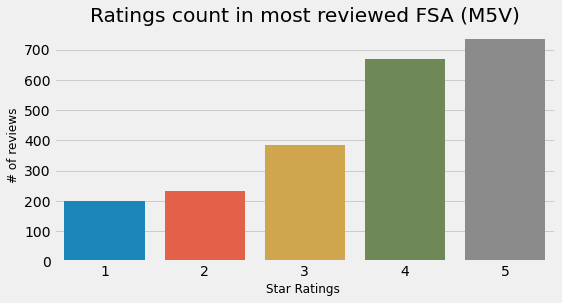

In [20]:
#Get the distribution of the ratings
# x=most_review_FSA["stars_y"].value_counts()
# x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
sns.barplot(x=most_review_FSA["stars_y"], y=most_review_FSA["count"], data=most_review_FSA)
plt.title("Ratings count in most reviewed FSA (M5V)")
plt.ylabel('# of reviews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

# #adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

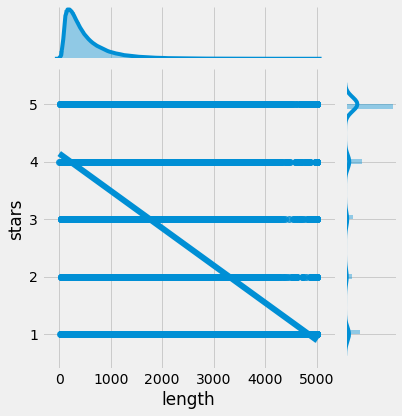

In [21]:
# plot the correlation between review text length vs star rating
import matplotlib.pyplot as plt

df_review_csv_sept["length"] = df_review_csv_sept["text"].apply(len)
sns.jointplot(x=df_review_csv_sept["length"],
              y=df_review_csv_sept["stars"],
              data=df_review_csv_sept, kind='reg')

# The graph shows the longer the text the lower the star rating

In [22]:
# top 20 restaurant names with the highest count
df_restaurant_tor.name.value_counts().index[:20].tolist()

['"Starbucks"',
 '"Tim Hortons"',
 '"McDonald\'s"',
 '"Subway"',
 '"Second Cup"',
 '"Pizza Pizza"',
 '"Swiss Chalet Rotisserie & Grill"',
 '"Aroma Espresso Bar"',
 '"LCBO"',
 '"Pizzaiolo"',
 '"Popeyes Louisiana Kitchen"',
 '"Tim Horton\'s"',
 '"Freshii"',
 '"Wild Wing"',
 '"Pizza Nova"',
 '"Domino\'s Pizza"',
 '"DAVIDsTEA"',
 '"The Second Cup"',
 '"Thai Express"',
 '"Booster Juice"']

In [23]:
# subset restaurants with the most reviews
most_reviewed = pd.DataFrame(join_BID_tor_v2['name'].value_counts()[:20])

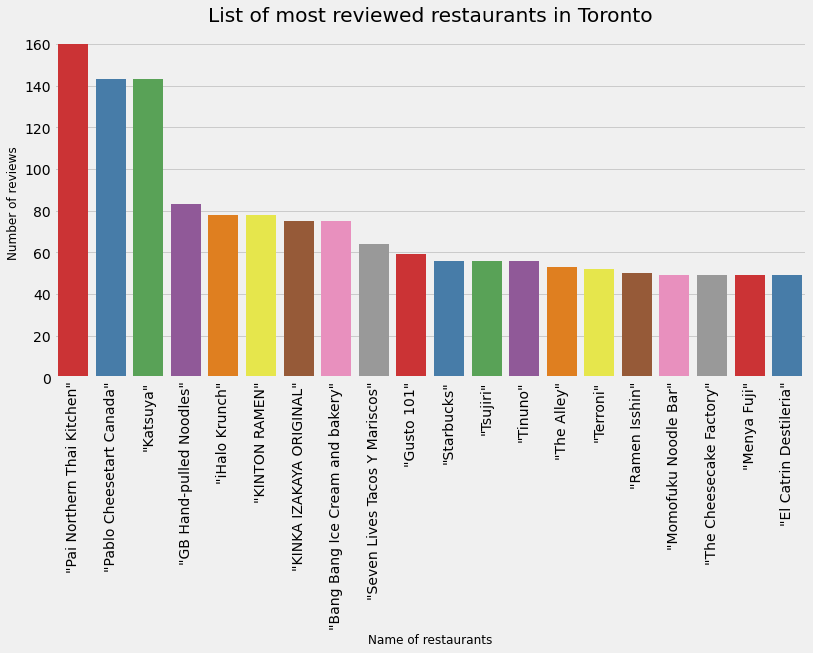

In [24]:
# plot the List of most reviewed restaurants in Toronto

plt.figure(figsize=(12,6))
g = sns.barplot(x=most_reviewed.index, y=most_reviewed['name'], palette = 'Set1')
plt.title('List of most reviewed restaurants in Toronto');
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Name of restaurants', fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

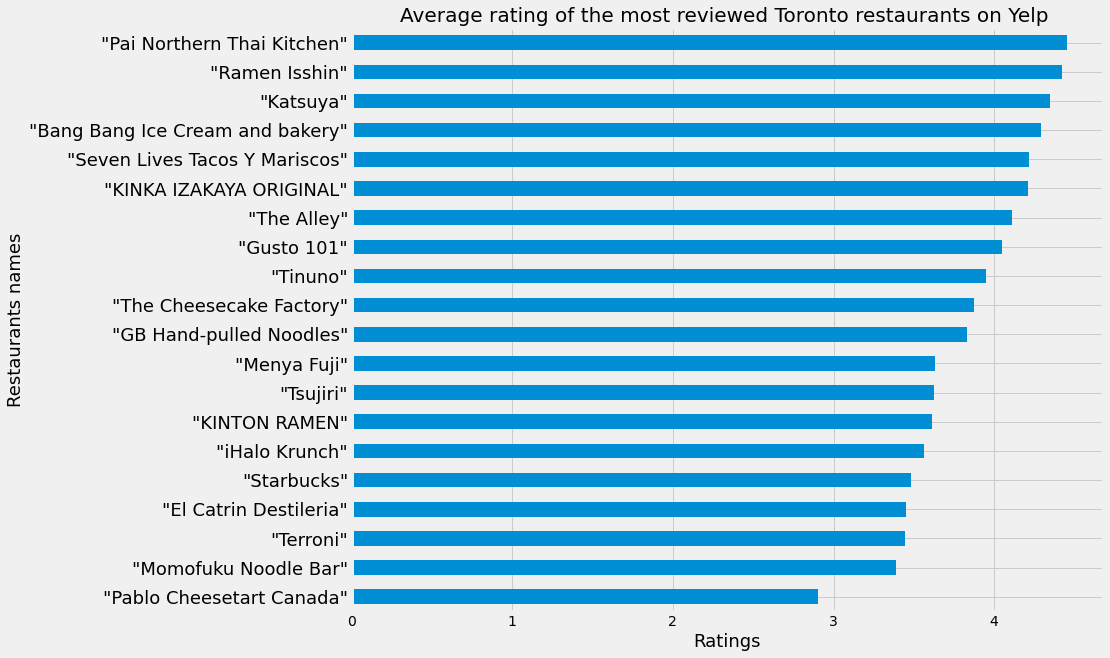

In [25]:
# Top rated restaurants on Yelp Toronto

df_review_csv_sept['name'] = df_review_csv_sept['business_id'].map(df_restaurant_tor.set_index('business_id')['name'])
# take the top only 20 most occurances restaurants for analysis. Because the dataset has over thousand business id. It will be really inefficient if we take all of the business name
top_restaurants = df_review_csv_sept.name.value_counts().index[:20].tolist()
# create a new dataframe called 'df_review_top' that only contains the reviews of 'top_restaurants'
df_review_top = df_review_csv_sept.loc[df_review_csv_sept['name'].isin(top_restaurants)]
# now we take the name column and count mean of stars of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then sort values in ascending order 
# then plot the graph
df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))

plt.yticks(fontsize=18)
plt.title('Average rating of the most reviewed Toronto restaurants on Yelp ',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)

plt.show()

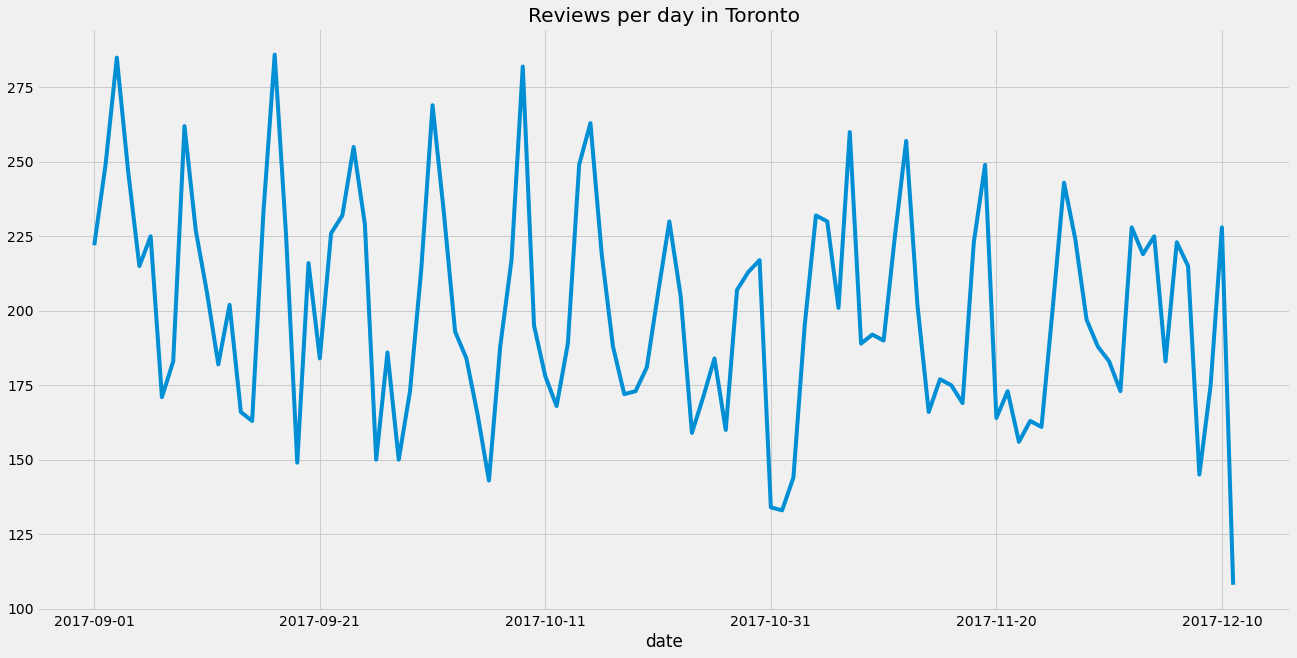

In [26]:
# plot for the reviews per day in Toronto

grp_date = join_BID_tor_v2.groupby(['date'])['business_id'].count()

ts = pd.Series(grp_date)
ts.plot(kind='line', figsize=(20,10),title='Reviews per day in Toronto')
plt.show()


In [27]:
# feature of text
join_BID_tor_v2['num_words'] = join_BID_tor_v2['text'].str.len()
join_BID_tor_v2['num_uniq_words'] = join_BID_tor_v2['text'].apply(lambda x: len(set(str(x).split())))
join_BID_tor_v2['num_chars'] = join_BID_tor_v2['text'].apply(lambda x: len(str(x)))
join_BID_tor_v2['num_stopwords'] = join_BID_tor_v2['text'].apply(lambda x: len([w for w in str(x).lower().split() 
                                                                                if w in set(stopwords.words('english'))]))

Text(0.5, 1.0, 'Distribution of Stop words')

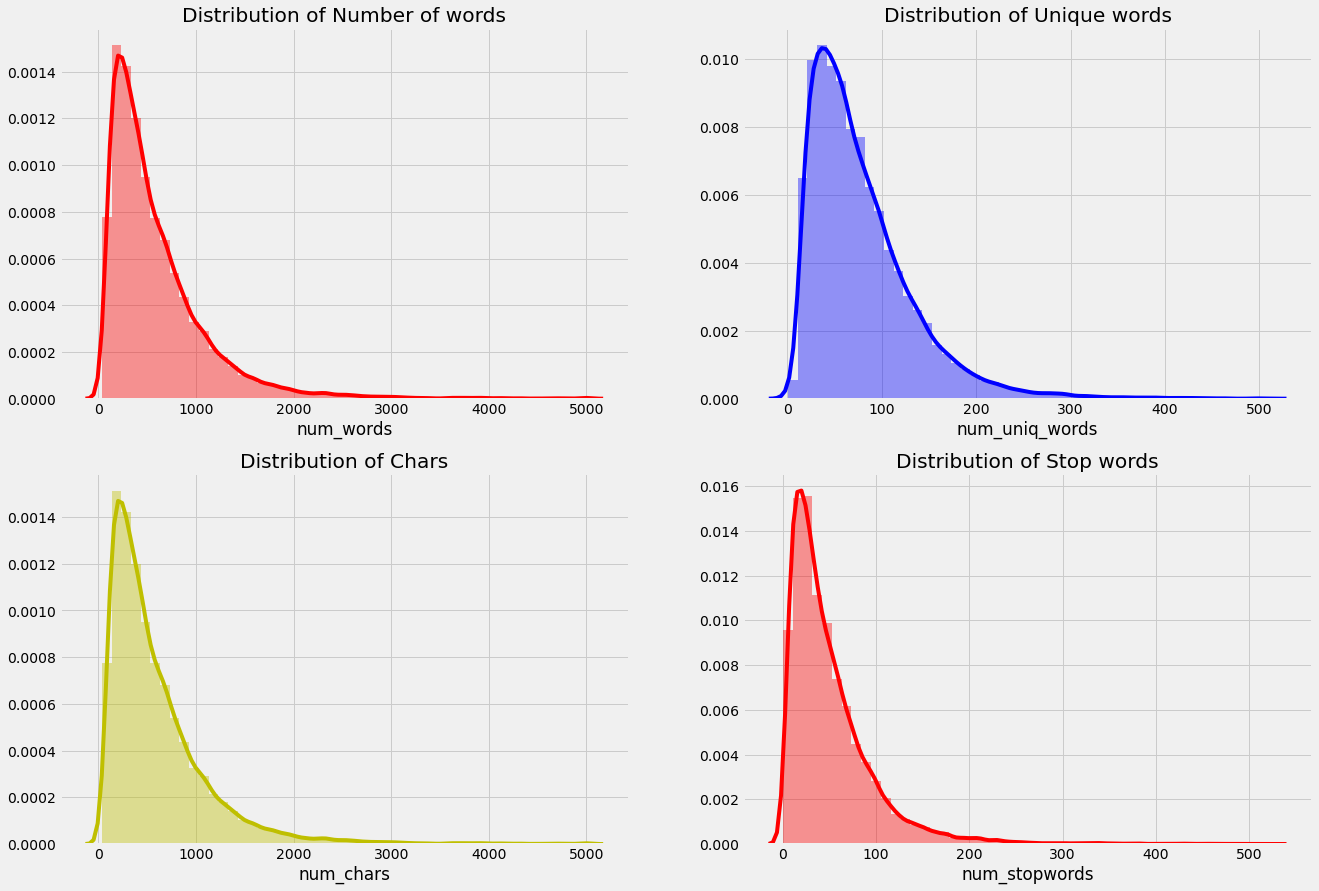

In [44]:
# Distribution of text feature
f, ax = plt.subplots(2,2, figsize = (20,14))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(join_BID_tor_v2['num_words'],bins=50,color='r', ax=ax1)
ax1.set_title('Distribution of Number of words')

sns.distplot(join_BID_tor_v2['num_uniq_words'],bins=50,color='b', ax=ax2)
ax2.set_title('Distribution of Unique words')

sns.distplot(join_BID_tor_v2['num_chars'],bins=50,color='y', ax=ax3)
ax3.set_title('Distribution of Chars')

sns.distplot(join_BID_tor_v2['num_stopwords'],bins=50,color='r', ax=ax4)
ax4.set_title('Distribution of Stop words')

# y-axis is probability density

In [45]:
join_BID_tor_v2.head(10)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,text,useful,funny,cool,FSA,Sentiment,num_words,num_uniq_words,num_chars,num_stopwords
0,0,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,Taco's were da bomb as expected. If they weren...,0,0,0,M4M,1,97,15,97,8
1,1,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,Chula is such a great addition to the east end...,0,0,0,M4M,1,855,112,855,64
2,2,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,One of the best tacos I've had. All 4 of us lo...,0,0,0,M4M,1,226,41,226,16
3,3,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,A beautiful and cozy little place! Randomly fo...,0,0,0,M4M,1,901,107,901,73
4,4,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,Pros -- The food was reasonably good. Their be...,0,0,0,M4M,1,692,100,692,62
5,5,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,The neighbourhood definitely needed a Mexican ...,1,0,0,M4M,1,471,63,471,42
6,6,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,Came here for lunch on a weekday.\n\nPros:\n\n...,1,0,0,M4M,1,337,56,337,24
7,7,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,First time here a few days ago. Had the tortil...,0,0,0,M4M,1,313,50,313,25
8,8,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,Went here with a group of friends a couple of ...,2,0,1,M4M,1,367,54,367,31
9,9,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,...,Hands down one of the best Interior StreetArt ...,1,0,2,M4M,1,1121,150,1121,111


In [29]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
df_review_top['text_clear'] = df_review_top['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

df_review_top['senti_polarity'] = df_review_top['text_clear'].apply(sentiment)

In [30]:
# wordcloud for Toronto

# filter reviews for only Toronto
df_Tor_review = df_review_csv_sept.loc[df_review_csv_sept['business_id'].isin(df_restaurant_tor.business_id)]

# clear the text
df_Tor_review['text_clear'] = df_Tor_review['text'].apply(preprocess)

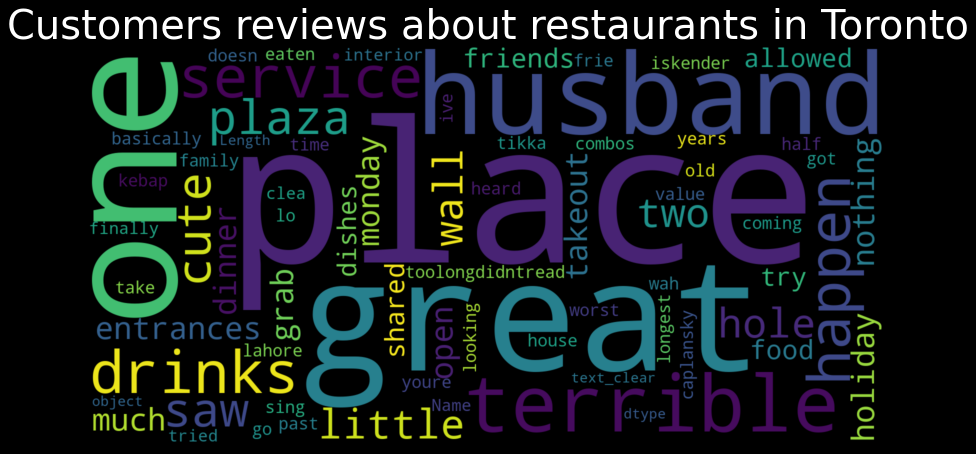

In [31]:
# difine wordcloud function from wordcloud library.
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_Tor_review['text_clear']))
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Customers reviews about restaurants in Toronto", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of configuration finally plot the graph
plt.show()

In [32]:
# wordcloud for Pai
# filter Pai
df_Pai_only = df_restaurant_tor.loc[df_restaurant_tor['name'] == '"Pai Northern Thai Kitchen"']
# filter reviews for only Pai
df_Pai_review = df_review_csv_sept.loc[df_review_csv_sept['business_id'].isin(df_Pai_only.business_id)]

# clear the text
df_Pai_review['text_clear'] = df_Pai_review['text'].apply(preprocess)

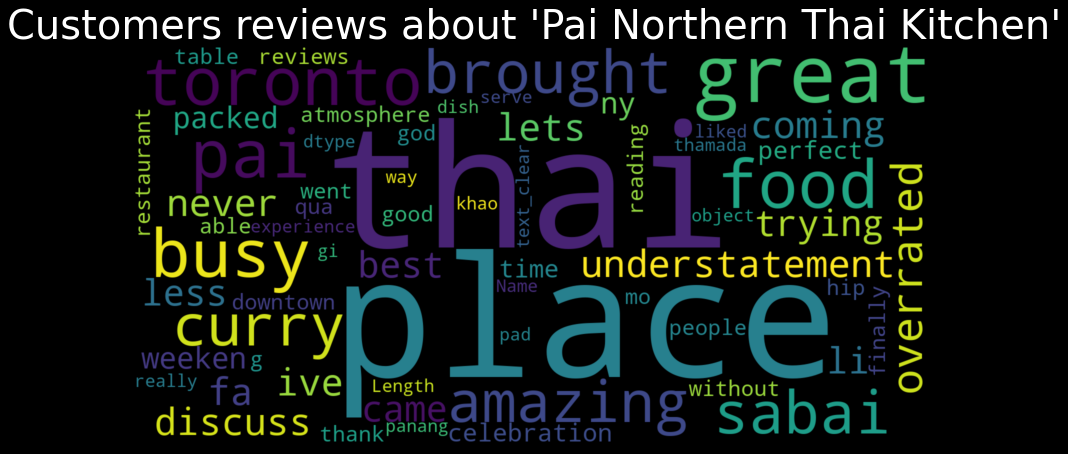

In [33]:
# difine wordcloud function from wordcloud library.
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_Pai_review['text_clear']))
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Customers reviews about 'Pai Northern Thai Kitchen'", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of configuration finally plot the graph
plt.show()

In [34]:
# top users
user_agg=df_review_csv_sept.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [35]:
# top users between Sept-Dec 2017
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("Top 10 Users in Yelp")
user_agg.head(10)

Top 10 Users in Yelp


review_id        date             useful funny  cool  \
                           count         min         max    sum   sum   sum   
user_id                                                                       
2pVj1Hid6_Iq3Th9xI0aOQ       112  2017-10-02  2017-11-18     46     3    30   
KBoIRjxSW7OWczv8OS9Bew       106  2017-09-03  2017-12-10     54    12    22   
bLbSNkLggFnqwNNzzq-Ijw        88  2017-09-01  2017-12-11   1781   803  1252   
Vf0hOeEgyN7ba1WOnUxBQQ        87  2017-09-04  2017-12-10     37     7    15   
hazFjLv3rVO_9V9wSQ55Gw        86  2017-09-01  2017-12-05     83    15    57   
keBv05MsMFBd0Hu98vXThQ        83  2017-09-01  2017-12-08    113     3   128   
6YmRpoIuiq8I19Q8dHKTHw        82  2017-09-07  2017-12-10      8     2     7   
9pNcdrQLWWrX0vEGGJlEbg        81  2017-09-03  2017-12-06    157    31    72   
1zak35bVariWhWPN3mANPw        81  2017-09-01  2017-12-10      8     0     1   
qKpkRCPk4ycbllTfFcRbNw        80  2017-09-01  2017-12-10     15     3     8   

                           stars  
                            mean  
user_id                           
2pVj1Hid6_Iq3Th9xI0aOQ  3.955357  
KBoIRjxSW7OWczv8OS9Bew  3.915094  
bLbSNkLggFnqwNNzzq-Ijw  3.613636  
Vf0hOeEgyN7ba1WOnUxBQQ  4.655172  
hazFjLv3rVO_9V9wSQ55Gw  3.360465  
keBv05MsMFBd0Hu98vXThQ  4.855422  
6YmRpoIuiq8I19Q8dHKTHw  4.536585  
9pNcdrQLWWrX0vEGGJlEbg  3.864198  
1zak35bVariWhWPN3mANPw  3.172840  
qKpkRCPk4ycbllTfFcRbNw  3.400000

In [61]:
# top users
user_agg=join_BID_tor_v2.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars_y':['mean']})

In [62]:
# top users between Sept-Dec 2017
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("Top 10 Users in Yelp")
user_agg.head(10)

Top 10 Users in Yelp


review_id        date             useful funny cool  \
                           count         min         max    sum   sum  sum   
user_id                                                                      
2pVj1Hid6_Iq3Th9xI0aOQ        92  2017-10-02  2017-11-18     31     2   22   
iHXSU0DRpRZHX8esGPG0Pw        53  2017-10-06  2017-11-29     35    10   21   
uz5-sq6wHrXScrIWb8r1Mg        48  2017-09-01  2017-12-08    150    15   90   
BwwqlPVsJk1dbUyNwCWB7Q        45  2017-09-07  2017-12-10      1     0    1   
_YpeP6XW2Dgw3AvN2wKqlA        42  2017-09-21  2017-09-24      5     3    0   
O3q-nwYZykMmacxjru01Zg        41  2017-09-27  2017-12-08    179    32  116   
G3civyLatxrzYk0lln3MUQ        40  2017-09-01  2017-09-05      3     1    0   
XbiKsujS_qxU3xsr0xUqmQ        39  2017-09-08  2017-11-24      4     1    0   
1X0-0MSbLD9-XYxCAhcENg        39  2017-11-16  2017-12-09      7     0    2   
wvjcjOdVAcvJ-6Lc4Yn9-Q        37  2017-09-09  2017-10-06      6     0    0   

                         stars_y  
                            mean  
user_id                           
2pVj1Hid6_Iq3Th9xI0aOQ  3.913043  
iHXSU0DRpRZHX8esGPG0Pw  3.943396  
uz5-sq6wHrXScrIWb8r1Mg  3.395833  
BwwqlPVsJk1dbUyNwCWB7Q  3.711111  
_YpeP6XW2Dgw3AvN2wKqlA  3.500000  
O3q-nwYZykMmacxjru01Zg  3.804878  
G3civyLatxrzYk0lln3MUQ  3.125000  
XbiKsujS_qxU3xsr0xUqmQ  3.410256  
1X0-0MSbLD9-XYxCAhcENg  4.564103  
wvjcjOdVAcvJ-6Lc4Yn9-Q  3.675676

In [46]:
%%time
# read all csv files
# join_BID_tor = pd.read_csv('join_BID_tor.csv')
join_BID_tor_v2 = pd.read_csv('join_BID_tor_v2.csv')
df_restaurant_tor = pd.read_csv('df_restaurant_tor.csv')
df_review_csv_sept = pd.read_csv('df_review_csv_sept.csv')

CPU times: user 2.62 s, sys: 418 ms, total: 3.04 s
Wall time: 3.04 s


**Topic Modeling**

Topic Modelling is different from rule-based text mining approaches that use regular expressions or dictionary based keyword searching techniques. It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.

In [55]:
join_BID_tor_v2 = pd.read_csv('join_BID_tor_v2.csv')
%%time
# clean text
lemma = WordNetLemmatizer()

def clean_text(doc):
    corpus = []
    for c in range(0, doc.shape[0]):
        stop_free = ' '.join([i for i in doc['text'][c].lower().split() if i not in set(stopwords.words('english'))])
        puct_free = ''.join(i for i in stop_free if i not in set(string.punctuation))
        normalized = [lemma.lemmatize(word) for word in puct_free.split()]
        corpus.append(normalized)
    return corpus
doc_tips = clean_text(join_BID_tor_v2)

CPU times: user 4min 36s, sys: 31.3 s, total: 5min 8s
Wall time: 5min 8s


In [56]:
# LDA model
dictionary = corpora.Dictionary(doc_tips)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_tips]
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics= 3, id2word= dictionary, passes=20)

In [57]:
#print(ldamodel.print_topics(num_topics=3,num_words=5))

for topic in ldamodel.show_topics(num_topics=5, formatted=False, num_words= 5):
    print('Topic {}: words'.format(topic[0]))
    topic_word = [w for (w,val) in topic[1]]
    print(topic_word)

Topic 0: words
['food', 'time', 'u', 'service', 'order']
Topic 1: words
['great', 'food', 'place', 'good', 'service']
Topic 2: words
['good', 'chicken', 'place', 'like', 'sauce']


In [58]:
%%time
# Top topics in document
tp = ldamodel.top_topics(doc_term_matrix,topn=20,dictionary=dictionary)


CPU times: user 425 ms, sys: 2.97 ms, total: 428 ms
Wall time: 427 ms


Took 0.1648845672607422 s


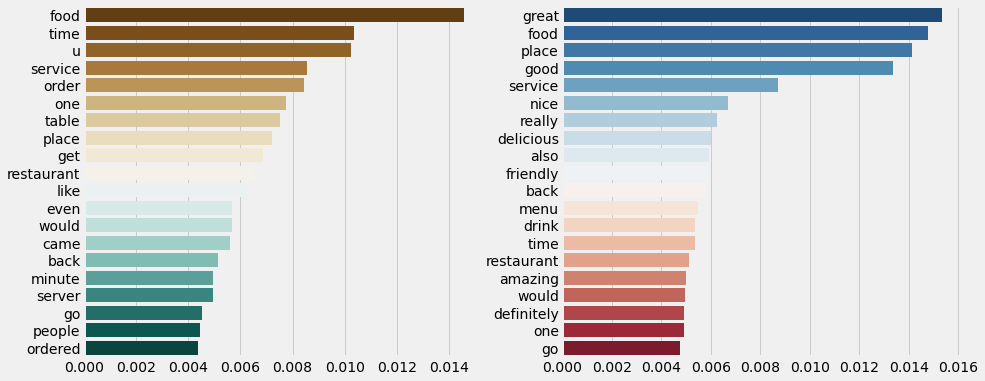

In [59]:
start_time=time.time()

# tuple unpacking
label = [] 
value = []

f,ax = plt.subplots(1,2,figsize = (14,6))
ax1.set_title(tp[0])
ax1,ax2 = ax.flatten()
for i,k in tp[0][0]:
    label.append(i)
    value.append(k)
sns.barplot(label,value,palette='BrBG', ax=ax1)

label = [] 
value = []
for i,k in tp[1][0]:
    label.append(i)
    value.append(k)
sns.barplot(label,value,palette='RdBu_r', ax= ax2);

# logging time
end_time=time.time()
print("Took",end_time-start_time,"s")

**Sentiment analysis**

In [10]:
%%time
# NLP Model, MultinomialNB method

join_BID_tor_v2 = join_BID_tor_v2[(join_BID_tor_v2["stars_y"]==1) | (join_BID_tor_v2["stars_y"]==5)]
X_Data = join_BID_tor_v2["text"]
Y_Data = join_BID_tor_v2["stars_y"]

cv = CountVectorizer()
X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)
model = MultinomialNB()
model.fit(X_Train,Y_Train)
predicted = model.predict(X_Test)
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           1       0.92      0.89      0.91       657
           5       0.96      0.97      0.97      1981

    accuracy                           0.95      2638
   macro avg       0.94      0.93      0.94      2638
weighted avg       0.95      0.95      0.95      2638

CPU times: user 725 ms, sys: 0 ns, total: 725 ms
Wall time: 723 ms


In [11]:
%%time
# NLP Model, LogisticRegression method

join_BID_tor_v2 = join_BID_tor_v2[(join_BID_tor_v2["stars_y"]==1) | (join_BID_tor_v2["stars_y"]==5)]
X_Data = join_BID_tor_v2["text"]
Y_Data = join_BID_tor_v2["stars_y"]

cv = CountVectorizer()
X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)
model = LogisticRegression()
model.fit(X_Train,Y_Train)
predicted = model.predict(X_Test)
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           1       0.94      0.91      0.92       657
           5       0.97      0.98      0.97      1981

    accuracy                           0.96      2638
   macro avg       0.95      0.94      0.95      2638
weighted avg       0.96      0.96      0.96      2638

CPU times: user 3.82 s, sys: 4.05 s, total: 7.87 s
Wall time: 2.49 s


In [12]:
%%time
# bag of words Model
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 35.8 µs


In [13]:
%%time
# LogisticRegression method
join_BID_tor_v2 = join_BID_tor_v2[(join_BID_tor_v2["stars_y"]==1) | (join_BID_tor_v2["stars_y"]==5)]
X_Data = join_BID_tor_v2["text"]
Y_Data = join_BID_tor_v2["stars_y"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)

obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', LogisticRegression())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(confusion_matrix(Y_Test, predict))
print(classification_report(Y_Test, predict))

[[ 493  164]
 [   9 1972]]
              precision    recall  f1-score   support

           1       0.98      0.75      0.85       657
           5       0.92      1.00      0.96      1981

    accuracy                           0.93      2638
   macro avg       0.95      0.87      0.90      2638
weighted avg       0.94      0.93      0.93      2638

CPU times: user 1min 24s, sys: 12.2 s, total: 1min 36s
Wall time: 1min 34s


In [14]:
%%time
# MultinomialNB method
join_BID_tor_v2 = join_BID_tor_v2[(join_BID_tor_v2["stars_y"]==1) | (join_BID_tor_v2["stars_y"]==5)]
X_Data = join_BID_tor_v2["text"]
Y_Data = join_BID_tor_v2["stars_y"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)

obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(confusion_matrix(Y_Test, predict))
print(classification_report(Y_Test, predict))

[[ 111  546]
 [   0 1981]]
              precision    recall  f1-score   support

           1       1.00      0.17      0.29       657
           5       0.78      1.00      0.88      1981

    accuracy                           0.79      2638
   macro avg       0.89      0.58      0.58      2638
weighted avg       0.84      0.79      0.73      2638

CPU times: user 1min 23s, sys: 10.6 s, total: 1min 33s
Wall time: 1min 33s


In [15]:
%%time
# Regression Model
X_Data = join_BID_tor_v2["text"]
Y_Data = join_BID_tor_v2["stars_y"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', LinearRegression())])
val = pipe.fit(X_Train,Y_Train)

CPU times: user 1min, sys: 9.59 s, total: 1min 9s
Wall time: 1min 6s
